In [74]:
# Example usage
N = 100
M = 10
q0 = 0.1
q1 = 0.01
p1 = 0.05
time_steps = 10
num_sims = 50
method = 'Q1'

p_values = np.linspace(0.01, 0.5, 10)
plot_results(N, M, q0, q1, p1, time_steps, num_sims, method, p_values)

TypeError: plot_results() missing 3 required positional arguments: 'method3', 'method4', and 'values'

In [1]:
import os
import pickle
import numpy as np

from algos import *
from infect import infect
from sbm import SBM

In [2]:
# Example usage
N = 100
M = 10
q0 = 0.1
q1 = 0.01
p1 = 0.05
time_steps = 10
num_sims = 50
method = 'Q1'

p_values = np.linspace(0.01, 0.5, 10)
plot_results(N, M, q0, q1, p1, time_steps, num_sims, method, p_values)

NameError: name 'plot_results' is not defined

In [3]:
def create_communities(s, N, M):
    size = round(N/M)
    communities = []

    for i in range(M):
        if(i == M-1):
            comm = s[i*size:]
        else:
            comm = s[i*size:(i+1)*(size)]
        communities.append(comm)

    return communities

In [52]:
def iter(N,M,q0,q1,p0,p1,time_steps,num_sims,method,dataset='sbm'):

    name = dataset+'N'+str(N)+'_M'+str(M)+'_SIM'+str(num_sims)+'_step'+str(time_steps)+'_q0'+str(q0)+'_q1'+str(q1)+'_p0'+str(p0)+'_p1'+str(p1)+method+'graphs.pkl'
    if not os.path.isfile(name):
        print('Generating synthetic dataset!')
        Gs = np.zeros((num_sims,N,N))
        Communities = dict()
        data = dict()
        Individuals = dict()
        if dataset=='sbm':
            for i in range(num_sims):
                Gs[i] = SBM(N,M,q0,q1)
                ###################################################
                '''your code here'''
                ###################################################
                Individuals[i] = infect(Gs[i],p0,p1,time_steps)
                s = Individuals[i]
                Communities[i] = create_communities(s,N,M)
                print(Communities[i])
        elif dataset=='iid':
            for i in range(num_sims):
                ###################################################
                '''your code here'''
                individuals = np.random.choice([0, 1], size=N, p=[1 - p0, p0])
                Individuals[i] = individuals
                s = Individuals[i]
                print(s)
                Communities[i] = create_communities(s, N,M)
                print(Communities[i])
                ###################################################
        data['graph'] = Gs
        data['communities'] = Communities
        data['individuals'] = Individuals
        with open(name, 'wb') as infile:
            pickle.dump(data,infile) 
    #         print('Dataset done!')


    ###################################################
    '''your code for initialization parameters if needed''' 
    fraction_ppl = 0
    fraction_family = 0
    fraction_ppl_in_family = 0
    num_tests = 0
    num_stages = 0

    total_infected = 0
    
    total_infected_communities = 0
    tot_avg = 0
    
    ###################################################
        
    if os.path.isfile(name):
        with open(name, 'rb') as infile:
            data = pickle.load(infile) 
       # print('Data loaded!')
    for i in range(num_sims): 
        avg1 = 0
        total_infected_communities_thiscycle = 0
        
        '''
        if dataset=='synthetic':
            G = data['graph'][i]
            communities = data['communities'][i]
            individuals = data['individuals'][i]
        '''
        ###################################################
        '''your code to calculate the statistics here''' 
        communities = data['communities'][i]
        individuals = data['individuals'][i]

        total_infected += (num_infected(individuals))
    

        #Should be all infected communities in entire simulation
        for community in communities:
            if num_infected(community) > 0:
                total_infected_communities += 1
                total_infected_communities_thiscycle += 1


        for community in communities:
            # Yields a list of people in that particular community on this simulation
            family_infections = num_infected(community)
            if(family_infections > 0):
                avg1 += (family_infections / len(community))

        if(total_infected_communities_thiscycle > 0):
            avg1 = avg1 / total_infected_communities_thiscycle
        tot_avg += avg1


        if(method == "binary"):
            G = data['graph']
            
            numtests_bs, num_stages_bs, _ = binary_splitting(individuals)
            num_tests += numtests_bs
            num_stages += num_stages_bs
            

        elif(method == "Q1"):
            G = data['graph']
           
            numtests_q1, num_stages_q1 = Qtesting1(individuals)
            num_tests += numtests_q1
            num_stages += num_stages_q1
        elif(method == "Q2"):
            G = data['graph']
            
            numtests_q2, num_stages_q2 = Qtesting2(individuals)
            num_tests += numtests_q2
            num_stages += num_stages_q2
        elif(method == "diag"):
            G = data['graph']
            
            numtests_diag, num_stages_diag = diag_splitting(individuals)
            num_tests += numtests_diag
            num_stages += num_stages_diag

        #elif(method == "Q1_C"):
        #elif(method == "Q2_C"):
        
        ###################################################

        # interleave the individuals
        #s = Individuals.copy()
        #infectedNumber = num_infected(s)
        #print(infectedNumber)
        #np.random.shuffle(s)
        # binary
       # numtests_bs, num_stages_bs, _ = binary_splitting(s)
        '''
        # algorithm 1
        numtests_q1, num_stages_q1 = Qtesting1(s)
        # algorithm 2
        numtests_q2, num_stages_q2 = Qtesting2(s)
        # community-aware
        numtests_q1_c, num_stages_q1_c = Qtesting1_comm_aware(Individuals.copy(),communities)
        # community-aware
        numtests_q2_c, num_stages_q2_c = Qtesting2_comm_aware(Individuals.copy(),communities)
        '''

    ###################################################
    '''your code to calculate the statistics here''' 
    '''Do not forget to take the average'''
    num_tests /= num_sims
    num_stages /= num_sims

    #s = Individuals.copy()
    #num_infected(s)
    #Should average all infected people over total number of people in all simulations 
    fraction_ppl = total_infected / (N * num_sims)

    #Need to figure out how to establish communities properly
    #Fraction family: average infected communities / total communities as a percentage
    fraction_family = total_infected_communities / (M * num_sims)
    
    #fraction_ppl_in_family:  is the number of people infected in a family / total size of family (averaged)
    fraction_ppl_in_family = tot_avg / (num_sims)
            

    return fraction_ppl, fraction_family, fraction_ppl_in_family, num_tests, num_stages
        

<div class="alert alert-warning">
<b>Task 1 </b> 
Plot how the fraction of infected people, the percentage of infected communities, and the average percentage of infected people in each community change with the each setting for the synthetic dataset described in the following table and comment on the results. Average over at least $100$ SBM network realization.     

</div>

| N | M | q0, q1 | p0 | p1 |time steps  |
|---|---|--------|----|----|------------|
|256| 16| (1,0)  |0.001|[0.05:1]|2|
|   | 16|(0.9, 0.1)  | 0.001| [0.05:1]|2     |
|   | 16 |(0.5, 0.2)  | 0.001| [0.05:1]|2     |

In [5]:
#iter(N,M,q0,q1,p0,p1,time_steps,num_sims,method,dataset='sbm')
#Test 1:
N = 256
M = 14
q0 = 1
q1 = 0
#interconnection, seperate entities
p0 = 0.001

#inraconnection, within the same group, creates an array of [0.05:0.1:1]
p1 = np.arange(0.05, 1.05, 0.1)
time_steps = 2
method = "BS"
num_sims = 1

for p_val in (p1):
    iter(N,M,q0,q1,p0,p_val,time_steps,num_sims,method,dataset='iid')



Generating synthetic dataset!
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0

In [53]:
import matplotlib.pyplot as plt

def plot_results(N, M, q0, q1, p1, time_steps, num_sims, method, method2, method3, method4, values):
    num_tests_list = []
    num_stages_list = []

    num_tests_list2 = []
    num_stages_list2 = []

    num_tests_list3 = []
    num_stages_list3 = []  

    num_tests_list4 = []
    num_stages_list4 = []   
    for p0 in values:
        _, _, _, num_tests, num_stages = iter(N, M, q0, q1, p0, p1, time_steps, num_sims, method, dataset='iid')
        num_tests_list.append(num_tests)
        num_stages_list.append(num_stages)

    for p0 in values:
        _, _, _, num_tests, num_stages = iter(N, M, q0, q1, p0, p1, time_steps, num_sims, method2, dataset='iid')
        num_tests_list2.append(num_tests)
        num_stages_list2.append(num_stages)

    for p0 in values:
        _, _, _, num_tests, num_stages = iter(N, M, q0, q1, p0, p1, time_steps, num_sims, method3, dataset='iid')
        num_tests_list3.append(num_tests)
        num_stages_list3.append(num_stages)     

    for p0 in values:
        _, _, _, num_tests, num_stages = iter(N, M, q0, q1, p0, p1, time_steps, num_sims, method4, dataset='iid')
        num_tests_list4.append(num_tests)
        num_stages_list4.append(num_stages)      
    plt.figure(figsize=(18, 8))
    
    # Plot for number of tests
    plt.subplot(1, 2, 1)
    plt.plot(p_values, num_tests_list, marker='o', label=method)
    plt.plot(p_values, num_tests_list2, marker='x', label=method2)
    plt.plot(p_values, num_tests_list3, marker='^', label=method3)
    plt.plot(p_values, num_tests_list4, marker='^', label=method4)
    plt.title('Number of Tests vs p0')
    plt.xlabel('p0')
    plt.ylabel('Number of Tests')
    plt.legend()
    
    # Plot for number of stages
    plt.subplot(1, 2, 2)
    plt.plot(p_values, num_stages_list, marker='o', label=method)
    plt.plot(p_values, num_stages_list2, marker='x', label=method2)
    plt.plot(p_values, num_stages_list3, marker='^', label=method3)
    plt.plot(p_values, num_stages_list4, marker='^', label=method4)
    plt.title('Number of Stages vs p0')
    plt.xlabel('p0')
    plt.ylabel('Number of Stages')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [57]:
def plot_infect(N, M, q0, q1, p1, time_steps, num_sims, method, values):
    frac_infected_list = []
    frac_infected_communities = []
    frac_infected_inCommunity = []

    for p1 in values:
        frac_infected, frac_communities, frac_inCommunity, _, _ = iter(N, M, q0, q1, p0, p1, time_steps, num_sims, method, dataset='sbm')
        frac_infected_list.append(frac_infected)
        frac_infected_communities.append(frac_communities)
        frac_infected_inCommunity.append(frac_inCommunity)

    plt.figure(figsize=(10, 8))

    plt.plot(values, frac_infected_list, marker='o', linestyle='-', color='b', label='Fraction of Infected Individuals')
    plt.plot(values, frac_infected_communities, marker='o', linestyle='-', color='g', label='Fraction of Infected Communities')
    plt.plot(values, frac_infected_inCommunity, marker='o', linestyle='-', color='r', label='Fraction of Infected Individuals within Communities')

    plt.title('Fraction of Infected Metrics vs p1')
    plt.xlabel('p1')
    plt.ylabel('Fraction')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

In [61]:
#Let us plot the infect data as p1 changes over time 
N = 256
M = 16
q0 = 1
q1 = 0
p0 = 0.001
time_steps = 2
num_sims = 100
method = 'infect'
p1_values = np.linspace(0.05, 0.95, 10)
plot_infect(N, M, q0, q1, p0, time_steps, num_sims, method, p1_values)

Generating synthetic dataset!
Original infected individuals:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Infected individuals after step  0  -  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

Generating synthetic dataset!
Original infected individuals:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Infected individuals after step  0  -  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

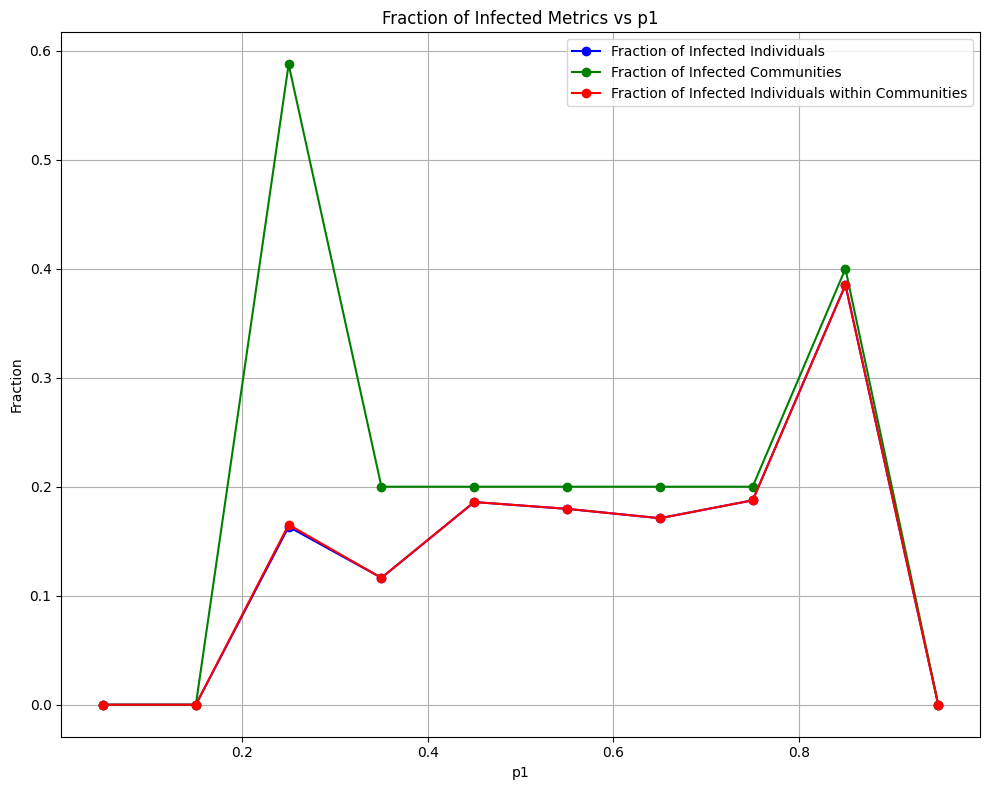

In [60]:
N = 256
M = 16
q0 = 0.9
q1 = 0.1
p0 = 0.001
time_steps = 2
num_sims = 5
method = 'infect'
p1_values = np.linspace(0.05, 0.95, 10)
plot_infect(N, M, q0, q1, p0, time_steps, num_sims, method, p1_values)

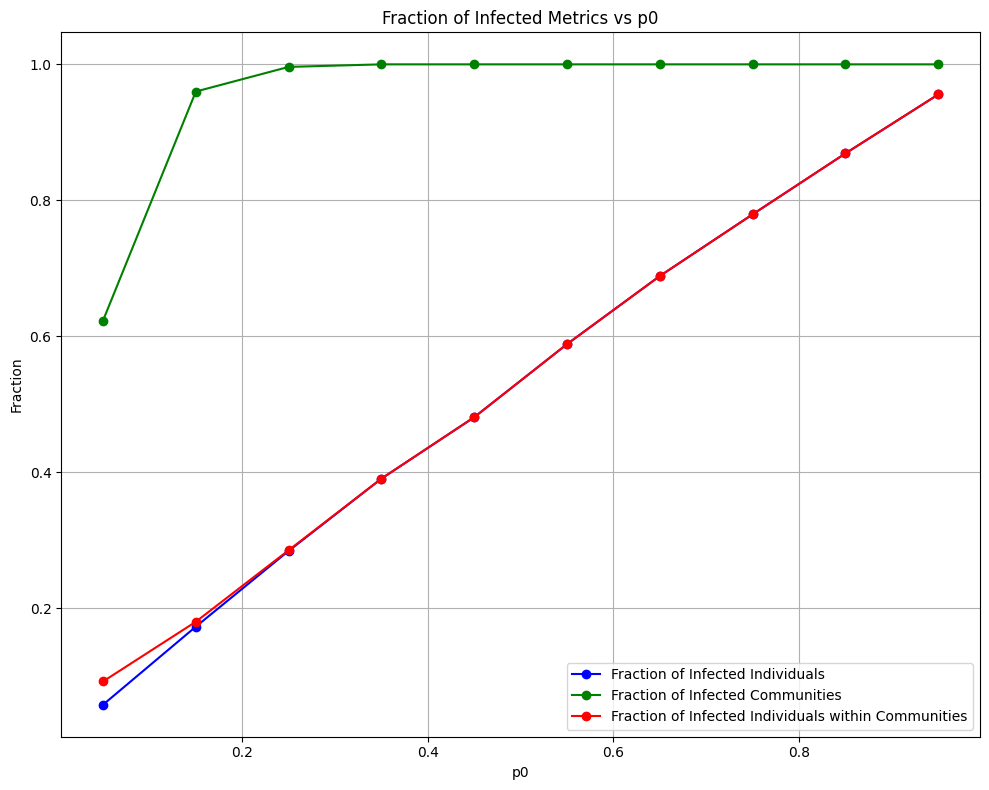

In [46]:
N = 256
M = 16
q0 = 0.5
q1 = 0.3
p0 = 0.001
time_steps = 2
num_sims = 100
method = 'infect'
p1_values = np.linspace(0.05, 0.95, 10)
plot_infect(N, M, q0, q1, p0, time_steps, num_sims, method, p1_values)

RUNNING TEST ON original:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 


TESTING group:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
--Num binary tests:  9
--Num binary stages:  9
RUNNING TEST ON original:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 


TESTING group:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0 infected --> ran only 1 test
RUNNING TEST O

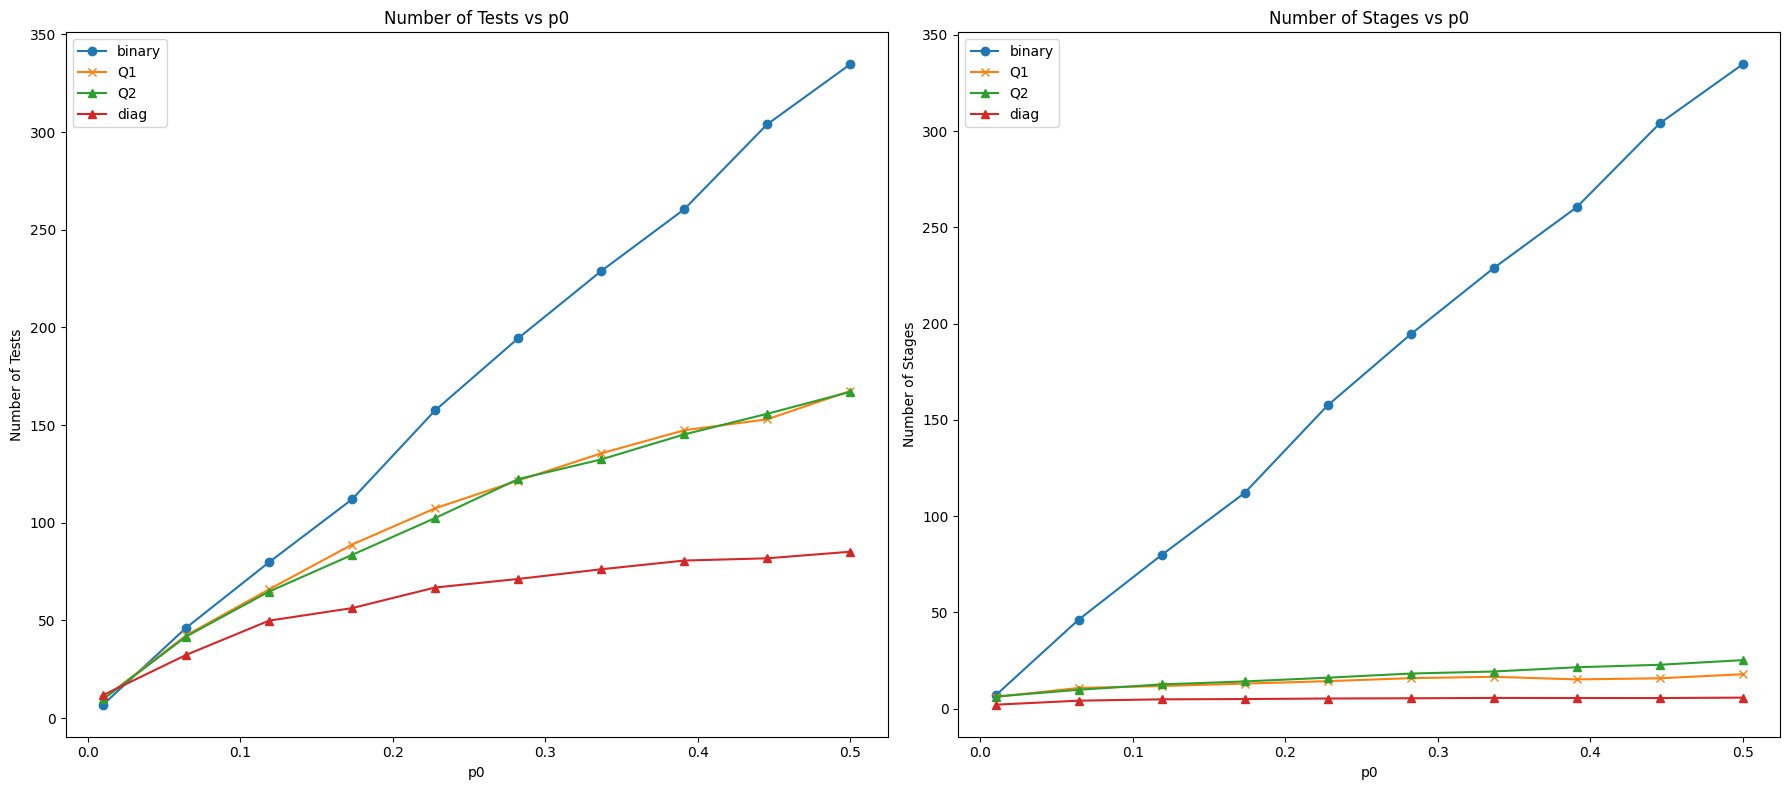

In [44]:
N = 100
M = 10
q0 = 0.1
q1 = 0.01
p1 = 0.05
time_steps = 10
num_sims = 50
method = 'binary'
method2 = 'Q1'
method3 = 'Q2'
method4 = 'diag'

p_values = np.linspace(0.01, 0.5, 10)
plot_results(N, M, q0, q1, p1, time_steps, num_sims, method, method2,method3, method4, p_values)

Consider $N=256$, and $M=16,64,128$. Use SBM with $q0=1$ and $q1=0$ to generate contact networks (disconnected cliques). For the infection model, use $p_0 = 0.001$ and $p_1 = [0.01:1]$ and the number of infection steps as $2$ . 
Average over 100 SBM network realizations.

<div class="alert alert-warning">
<b>Task 2 </b> 
Provide plots for i.i.d. infection probability that ranges from $p=0.01$ to $p=0.3$, and $N=256$.
Compare the performance of tests $T_1$, $T_2$, and binary output tests. Do you observe a consistent performance? Can you explain your results? 
    
</div>

<div class="alert alert-warning">
<b>Task 3 </b>  
Provide plots that compare the performance of various testing techniques on the Stochastic Block Model (SBM) using the settings outlined in Table 2 and on real data. You may explore additional settings that could reveal significant insights for your custom algorithms. Interpret and explain the results you obtain. Your plots should include: (i) a plot demonstrating how the performance of different testing schemes varies as the family sizes change, (ii)a plot demonstrating how the performance of different testing schemes varies as the infection probability changes and (iii) a plot illustrating how infections concentrate within families in the SBM.
</div>

| N | M | q0, q1 | p0 | p1 |time steps  |
|---|---|--------|----|----|------------|
|256| 16| (0.9,0.1)  |0.001|[0.05:1]|2|
|   | 64|(1, 0)  | 0.001| [0.05:1]|2     |
|   | 64|(0.9, 0.1)  | 0.001| [0.05:1]|2     |
|   | 64|(0.5, 0.2)  | 0.001| [0.05:1]|2     |
|   | 128 |(0.9, 0.1)  | 0.001| [0.05:1]|2     |


In [ ]:
N = 256
M = 16
q0 = 0.5
q1 = 0.3

time_steps = 2
method = 'your method'

In [ ]:
# the simulation 
t = 10
fraction_infected_ppl = np.zeros(t)
fraction_infected_clc = np.zeros(t)
fraction_infected_family = np.zeros(t)
num_tests = np.zeros((t,3))
num_stages = np.zeros((t,3))
p0 = 0.001
num_sims = 100
for j in range(1,t+1):
    p1 = j/t
    fraction_ppl[j-1], fraction_clc[j-1], fraction_plp_in_clc[j-1], num_tests[j-1], num_stages[j-1]= iter(N,M,q0,q1,p0,p1,time_steps,num_sims,method,dataset='sbm')  
       

In [ ]:
p1s = np.arange(1,t+1)/t

In [ ]:
plt.figure(figsize=(6, 4), dpi=300)
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})
markers = ['.', ',','o','v','^','<','>']
   
plt.plot(p1s,num_tests[:,i],label='binary splitting',marker=markers[i])
#########your code here###########

plt.xlabel('Transmission probability: p1',fontsize=14)
plt.ylabel('Expected number of tests',fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend(frameon=False, loc='best')
plt.tight_layout()
fig_name = 'RES_N'+str(N)+'_M'+str(M)+'SIM'+str(num_sims)+'step_'+str(time_steps)+'q0'+str(q0)+'q1'+str(q1)+'p0'+str(p0)+method+'GT.pdf'
plt.savefig(fig_name, format='pdf', bbox_inches='tight')

In [ ]:
plt.plot(p1s,fraction_ppl,label='Fraction of infected people')
plt.plot(p1s,fraction_clc,label='Fraction of infected communities')
plt.plot(p1s,fraction_plp_in_clc,label='Fraction of infected people in each community')
plt.xlabel('Transmission probability: p1',fontsize=14)
plt.ylabel('Infection stats',fontsize=14)
plt.legend()
plt.savefig('RES_N'+str(N)+'_M'+str(M)+'SIM'+str(num_sims)+'step_'+str(time_steps)+'q0'+str(q0)+'q1'+str(q1)+'p0'+str(p0)+method+'stats.pdf')